## Manipulating molecules with RDKit

### In this notebook, we will explore how to use RDKit to perform the initial stages of chemical data manipulation, preparing them for AI model training

In [1]:
# Import libraries

import pandas as pd
from rdkit import Chem
from rdkit.Chem import Draw


###  The visualization of chemical structures is a fundamental step in understanding the data. RDKit offers functions to convert SMILES strings into molecular representations that can be easily visualized. 

### Let’s start by creating a DataFrame with some simple molecules and their respective molecular weights.

In [2]:

df = pd.DataFrame(
   data={
       'smiles':[
           'CC(=O)OC(CC(=O)[O-])C[N+](C)(C)C',
           'CC(=O)OC(CC(=O)O)C[N+](C)(C)C',
           'CC(CN)O',
           'C1=CC(=C(C=C1[N+](=O)[O-])[N+](=O)[O-])Cl',
           'CCN1C=NC2=C(N=CN=C21)N',
           'CCC(C)(C(C(=O)O)O)O',
           'C(CCl)Cl',
           'C1=CC(=C(C=C1Cl)Cl)Cl',
           'C1CCC(=O)NCCCCCC(=O)NCC1',
           'C1C=CC(=NC1C(=O)O)C(=O)O',
           'C(C)(C)(C)(C)C'
       ],
       'mw':[
           203.24, 204.24, 75.11, 202.55, 163.18, 148.16, 98.96, 181.4, 
           226.32, 169.13, 100.00
       ]
   }
)
df

,smiles,mw
0,CC(=O)OC(CC(=O)[O-])C[N+](C)(C)C,203.24
1,CC(=O)OC(CC(=O)O)C[N+](C)(C)C,204.24
2,CC(CN)O,75.11
3,C1=CC(=C(C=C1[N+](=O)[O-])[N+](=O)[O-])Cl,202.55
4,CCN1C=NC2=C(N=CN=C21)N,163.18
5,CCC(C)(C(C(=O)O)O)O,148.16
6,C(CCl)Cl,98.96
7,C1=CC(=C(C=C1Cl)Cl)Cl,181.40
8,C1CCC(=O)NCCCCCC(=O)NCC1,226.32
9,C1C=CC(=NC1C(=O)O)C(=O)O,169.13


### To visualize these molecules, we use the MolsToGridImage method from RDKit's Draw library. Each molecule is converted from its SMILES string and arranged in a grid.



[21:42:20] Explicit valence for atom # 0 C, 5, is greater than permitted


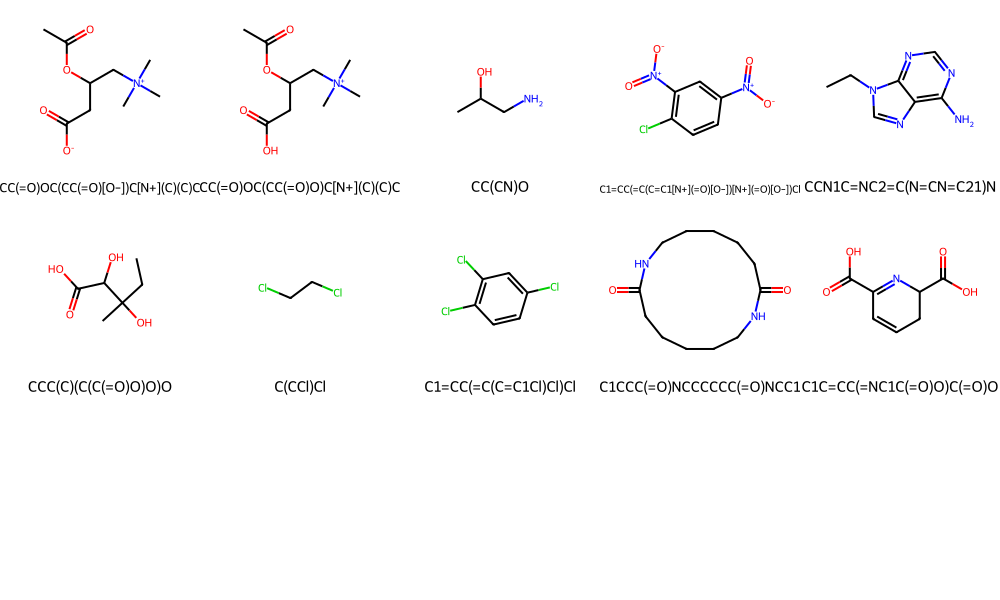

In [3]:
Draw.MolsToGridImage(
   [Chem.MolFromSmiles(mol) for mol in df['smiles']],
   molsPerRow=5,
   legends=[smiles for smiles in df['smiles']],
   subImgSize=(200,200)
)

### NOTE

Note that the molecule with index 10 was not displayed because its structure contains an inconsistency. In the provided SMILES representation, the carbon atom attempts to form five bonds, which violates the valence rule for carbon, allowing only four pairs of electrons.


### Handling Chemically Invalid Molecules

A common problem when working with molecular data is the presence of chemically impossible structures. RDKit allows you to check the validity of a molecule by converting it from its SMILES string. If the conversion fails, the molecule is considered invalid. To filter these molecules, we can apply the Chem.MolFromSmiles function and discard None values.

In [5]:

def rdkit_mol(smile: str):
    mol = Chem.MolFromSmiles(smile)
    return mol

df['mol'] = df['smiles'].apply(rdkit_mol)

# Drop rows where RDKit could not parse the molecule (mol == None)
df.dropna(ignore_index=True, inplace=True)

df

,smiles,mw,mol
0,CC(=O)OC(CC(=O)[O-])C[N+](C)(C)C,203.24,<rdkit.Chem.rdchem.Mol object at 0x7fb49205dc90>
1,CC(=O)OC(CC(=O)O)C[N+](C)(C)C,204.24,<rdkit.Chem.rdchem.Mol object at 0x7fb49205d990>
2,CC(CN)O,75.11,<rdkit.Chem.rdchem.Mol object at 0x7fb49205da50>
3,C1=CC(=C(C=C1[N+](=O)[O-])[N+](=O)[O-])Cl,202.55,<rdkit.Chem.rdchem.Mol object at 0x7fb49205d870>
4,CCN1C=NC2=C(N=CN=C21)N,163.18,<rdkit.Chem.rdchem.Mol object at 0x7fb49205d630>
5,CCC(C)(C(C(=O)O)O)O,148.16,<rdkit.Chem.rdchem.Mol object at 0x7fb49205d8d0>
6,C(CCl)Cl,98.96,<rdkit.Chem.rdchem.Mol object at 0x7fb49205d9f0>
7,C1=CC(=C(C=C1Cl)Cl)Cl,181.40,<rdkit.Chem.rdchem.Mol object at 0x7fb49205ddb0>
8,C1CCC(=O)NCCCCCC(=O)NCC1,226.32,<rdkit.Chem.rdchem.Mol object at 0x7fb49205de10>
9,C1C=CC(=NC1C(=O)O)C(=O)O,169.13,<rdkit.Chem.rdchem.Mol object at 0x7fb49205de70>


### NOTE

Here, we used the dropna function to remove invalid molecules. This ensures that the dataset used for training AI models contains only valid molecules.

### Handling Hydrogens

Explicitly adding and removing hydrogens is a useful feature in various stages of molecular manipulation. RDKit provides the AddHs and RemoveHs functions for this purpose, which can be useful for simulations and molecular property calculations.

Molecule containing explicit Hydrogen:


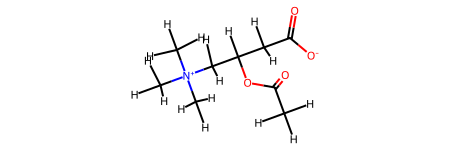

Molecule without explicit Hydrogen (implicit):


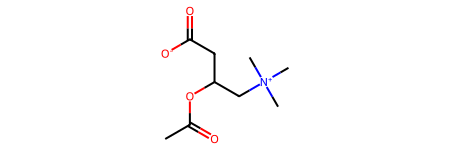

In [8]:
mol_h = Chem.AddHs(df['mol'].iloc[0]) # df['mol'].iloc[0] This select the 1st molecule of column mol
mol_nh = Chem.RemoveHs(mol_h)

print("Molecule containing explicit Hydrogen:")
display(mol_h)

print("Molecule without explicit Hydrogen (implicit):")
display(mol_nh)

In [10]:
def canonical_smiles(smile_str: str):
    mol = Chem.MolFromSmiles(smile_str)
    if mol is None:
        return None  # avoid error if the SMILES is invalid 
    return Chem.MolToSmiles(mol, canonical=True)

# Create a new column with canonical SMILES 
df['canonical'] = df['smiles'].apply(canonical_smiles)

# Eliminate duplicates (equivalent molecules)
df = df.drop_duplicates(subset=['canonical']).reset_index(drop=True)

df

,smiles,mw,mol,canonical
0,CC(=O)OC(CC(=O)[O-])C[N+](C)(C)C,203.24,<rdkit.Chem.rdchem.Mol object at 0x7fb49205dc90>,CC(=O)OC(CC(=O)[O-])C[N+](C)(C)C
1,CC(=O)OC(CC(=O)O)C[N+](C)(C)C,204.24,<rdkit.Chem.rdchem.Mol object at 0x7fb49205d990>,CC(=O)OC(CC(=O)O)C[N+](C)(C)C
2,CC(CN)O,75.11,<rdkit.Chem.rdchem.Mol object at 0x7fb49205da50>,CC(O)CN
3,C1=CC(=C(C=C1[N+](=O)[O-])[N+](=O)[O-])Cl,202.55,<rdkit.Chem.rdchem.Mol object at 0x7fb49205d870>,O=[N+]([O-])c1ccc(Cl)c([N+](=O)[O-])c1
4,CCN1C=NC2=C(N=CN=C21)N,163.18,<rdkit.Chem.rdchem.Mol object at 0x7fb49205d630>,CCn1cnc2c(N)ncnc21
5,CCC(C)(C(C(=O)O)O)O,148.16,<rdkit.Chem.rdchem.Mol object at 0x7fb49205d8d0>,CCC(C)(O)C(O)C(=O)O
6,C(CCl)Cl,98.96,<rdkit.Chem.rdchem.Mol object at 0x7fb49205d9f0>,ClCCCl
7,C1=CC(=C(C=C1Cl)Cl)Cl,181.40,<rdkit.Chem.rdchem.Mol object at 0x7fb49205ddb0>,Clc1ccc(Cl)c(Cl)c1
8,C1CCC(=O)NCCCCCC(=O)NCC1,226.32,<rdkit.Chem.rdchem.Mol object at 0x7fb49205de10>,O=C1CCCCCNC(=O)CCCCCN1
9,C1C=CC(=NC1C(=O)O)C(=O)O,169.13,<rdkit.Chem.rdchem.Mol object at 0x7fb49205de70>,O=C(O)C1=NC(C(=O)O)CC=C1


### NOTE
This process eliminates duplicates and ensures that only a single canonical form of each molecule is used. This is particularly useful in preprocessing stages for machine learning models, where consistency in the data is crucial.
